In [66]:
import numpy as np
import operator as op
import random as rd
import matplotlib.pyplot as plt


def weight(x, rou):
    w = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            for n in range(inputs):
                w[i][j] = w[i][j]+ (x[n][i]-rou)*(x[n][j]-rou)
    return w


def sign(x):
    for m in range(len(x)):
        if x[m] >= 0:
            x[m] = 1
        else:
            x[m] = -1
    return x


def learning(x_test, w, theta):
    count = 0
    temp = list(x_test)
    while 1:
        count = count + 1
        x_test = np.matmul(w, x_test)
        x_test = 0.5 + 0.5*sign(x_test - theta)
        x_test = list(x_test)
        if count == 10:
            break
    return x_test


def rand_int():
    a = rd.sample(range(0, dim), int(dim*rou))
    x = np.zeros(dim)
    for o in range(int(dim*rou)):
        x[a[o]] = 1
    return x


dim = 100
inputs = 150
# x = np.zeros((inputs, dim))
# for i in range(inputs):
#     x[i] = rand_int()

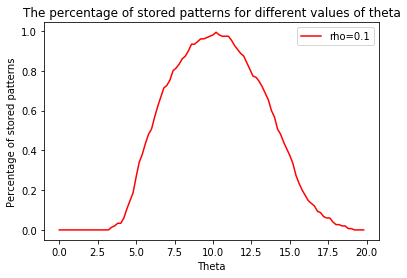

In [67]:
rou = 0.1
x = np.zeros((inputs, dim))
for i in range(inputs):
    x[i] = rand_int()
w = weight(x, rou)
rate = np.zeros(100)
theta = np.zeros(100)
for t in range(0, 100):
    theta[t] = t / 5
    attractors = []
    for j in range(len(x)):
        x_test = learning(x[j], w, theta[t])
        if x_test == list(x[j]):
            attractors.append(x_test)
    rate[t] = len(attractors)/inputs
plt.plot(theta, rate, color='red', label='rho=0.1')

# rou = 0.05
# x = np.zeros((inputs, dim))
# for i in range(inputs):
#     x[i] = rand_int()
# w = weight(x, rou)
# rate = np.zeros(100)
# theta = np.zeros(100)
# for t in range(0, 100):
#     theta[t] = t / 5
#     attractors = []
#     for j in range(len(x)):
#         x_test = learning(x[j], w, theta[t])
#         if x_test == list(x[j]):
#             attractors.append(x_test)
#     rate[t] = len(attractors)/inputs
# plt.plot(theta, rate, color='blue', label='rho=0.05')

# rou = 0.03
# x = np.zeros((inputs, dim))
# for i in range(inputs):
#     x[i] = rand_int()
# w = weight(x, rou)
# rate = np.zeros(100)
# theta = np.zeros(100)
# for t in range(0, 100):
#     theta[t] = t / 5
#     attractors = []
#     for j in range(len(x)):
#         x_test = learning(x[j], w, theta[t])
#         if x_test == list(x[j]):
#             attractors.append(x_test)
#     rate[t] = len(attractors)/inputs
# plt.plot(theta, rate, color='green', label='rho=0.03')

plt.xlabel('Theta')
plt.ylabel('Percentage of stored patterns')
plt.legend()
plt.title('The percentage of stored patterns for different values of theta')
plt.show()